In [1]:
from imutils import face_utils
from imutils.video import VideoStream
import argparse
import imutils
import dlib
import cv2
import time
import numpy as np
from PIL import Image as im
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [3]:
trainedPath = "../../shape_predictor_68_face_landmarks.dat"
model = load_model("../training/facial_1/", compile = True)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(trainedPath)

2021-11-20 15:44:44.747265: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-20 15:44:44.749263: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-20 15:44:44.749317: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2021-11-20 15:44:44.750342: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [56]:
emo = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


image = cv2.imread("../../happy-man-giving-thumbs-up-sign-full-length-portrait-yellow-background-176646320.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)

Detect : Happy


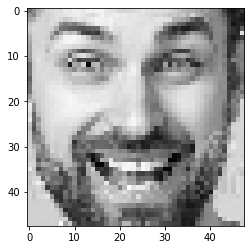

In [57]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)

for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the facial landmark (x, y)-coordinates to a NumPy
    # array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)

    # convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = face_utils.rect_to_bb(rect)

    tl = int(y)
    bl = int(y+w)
    tr = int(x)
    br = int(x+h)

    if (tl < 0):
        tl = 0
    if (bl > gray.shape[0]):
        bl = gray.shape[0]
    if (tr < 0):
        tr = 0
    if (br > gray.shape[1]):
        br = gray.shape[1]

    face = gray[tl:bl, tr:br]
    
    face = cv2.resize(face, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
    face = face.reshape(1, 48, 48, 1)
    
    y_prob = model.predict(face, batch_size=32, verbose=0)
    index = np.argmax(y_prob)
    print("Detect :", emo[index])
    
    #cv2.rectangle(gray, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # show the face number
    # cv2.putText(gray, "Face #{}".format(i + 1), (x - 10, y - 10),
    #     cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # loop over the (x, y)-coordinates for the facial landmarks
    # and draw them on the image
    # for (x, y) in shape:
    #     cv2.circle(gray, (x, y), 1, (0, 0, 255), -1)

plt.imshow(face[0], cmap='gray')
plt.show()